In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,mean_squared_error,accuracy_score,f1_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import math
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Problem -1

In [2]:
cubic = pd.read_csv('cubic_zirconia.csv')

In [3]:
cubic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  26967 non-null  int64  
 1   carat       26967 non-null  float64
 2   cut         26967 non-null  object 
 3   color       26967 non-null  object 
 4   clarity     26967 non-null  object 
 5   depth       26270 non-null  float64
 6   table       26967 non-null  float64
 7   x           26967 non-null  float64
 8   y           26967 non-null  float64
 9   z           26967 non-null  float64
 10  price       26967 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 2.3+ MB


In [4]:
cubic.duplicated().sum()

0

In [5]:
cubic=cubic.drop('Unnamed: 0',axis=1)

In [6]:
cubic.shape

(26967, 10)

In [7]:
cubic.isnull().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [8]:
cont=['carat','depth','table','x','y','z','price']

In [9]:
cubic.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,26967,NaN,NaN,NaN,0.798375,0.477745,0.2,0.4,0.7,1.05,4.5
cut,26967,5,Ideal,10816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,26967,7,G,5661,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,26967,8,SI1,6571,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,26270,NaN,NaN,NaN,61.7451,1.41286,50.8,61,61.8,62.5,73.6
table,26967,NaN,NaN,NaN,57.4561,2.23207,49,56,57,59,79
x,26967,NaN,NaN,NaN,5.72985,1.12852,0,4.71,5.69,6.55,10.23
y,26967,NaN,NaN,NaN,5.73357,1.16606,0,4.71,5.71,6.54,58.9
z,26967,NaN,NaN,NaN,3.53806,0.720624,0,2.9,3.52,4.04,31.8
price,26967,NaN,NaN,NaN,3939.52,4024.86,326,945,2375,5360,18818


In [10]:
cols = ['cut','color','clarity']
for i in cols:
    print(i,'\n')
    print(cubic[i].value_counts())

cut 

Ideal        10816
Premium       6899
Very Good     6030
Good          2441
Fair           781
Name: cut, dtype: int64
color 

G    5661
E    4917
F    4729
H    4102
D    3344
I    2771
J    1443
Name: color, dtype: int64
clarity 

SI1     6571
VS2     6099
SI2     4575
VS1     4093
VVS2    2531
VVS1    1839
IF       894
I1       365
Name: clarity, dtype: int64


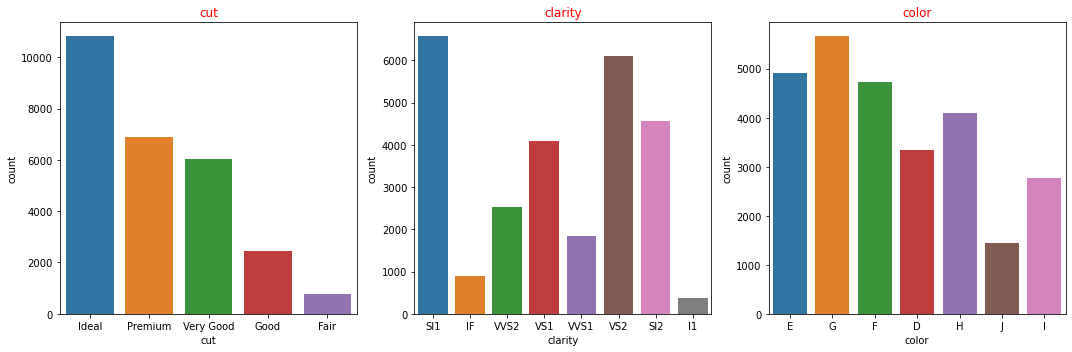

In [11]:
fig=plt.figure(figsize=(15,5))
cat=['cut','clarity','color']
for i in range(0,3):
    ax= fig.add_subplot(1,3,i+1)
    sns.countplot(x=cat[i],data=cubic)
    ax.set_title(cat[i],color='Red')
plt.tight_layout()
plt.show()

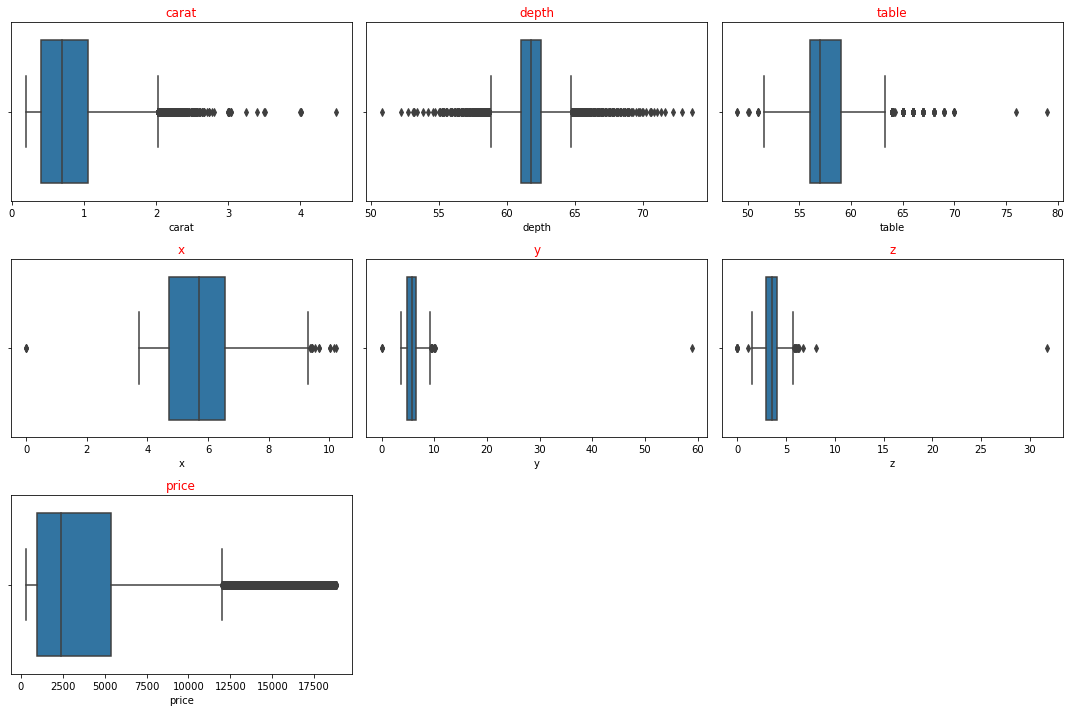

In [12]:
fig=plt.figure(figsize=(15,10))
for i in range(0,len(cont)):
    ax= fig.add_subplot(3,3,i+1)
    sns.boxplot(cont[i],data=cubic , orient = "h")
    ax.set_title(cont[i],color='Red')
plt.tight_layout()
plt.show()

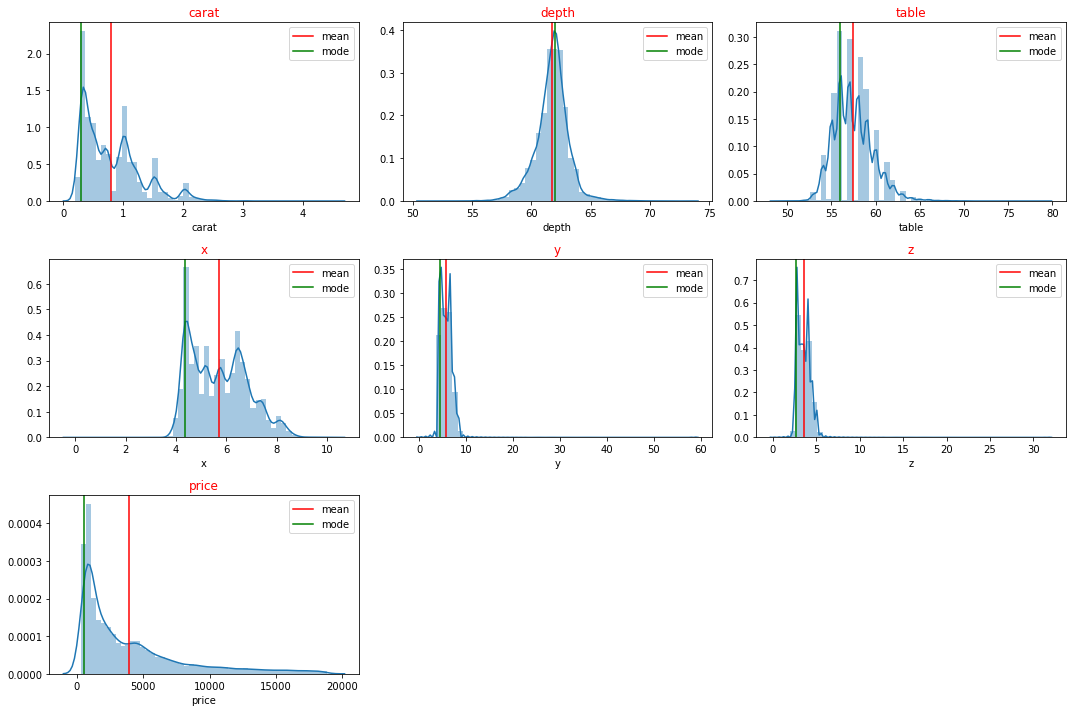

In [13]:
fig=plt.figure(figsize=(15,10))
for i in range(0,len(cont)):
    ax= fig.add_subplot(3,3,i+1)
    sns.distplot(cubic[cont[i]])
    plt.axvline(cubic[cont[i]].mean(),color='Red', label='mean')
    plt.axvline(cubic[cont[i]].mode()[0],color='Green', label='mode')
    ax.set_title(cont[i],color='Red')
    plt.legend()
plt.tight_layout()
plt.show()

In [14]:
cubic.skew()

carat    1.116481
depth   -0.028618
table    0.765758
x        0.387986
y        3.850189
z        2.568257
price    1.618550
dtype: float64

In [15]:
from scipy import stats
for i in cont:
    shapiro_test = stats.shapiro(cubic[i])
    print(i , np.round(shapiro_test[1],3))


carat 0.0
depth 1.0
table 0.0
x 0.0
y 0.0
z 0.0
price 0.0


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [16]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

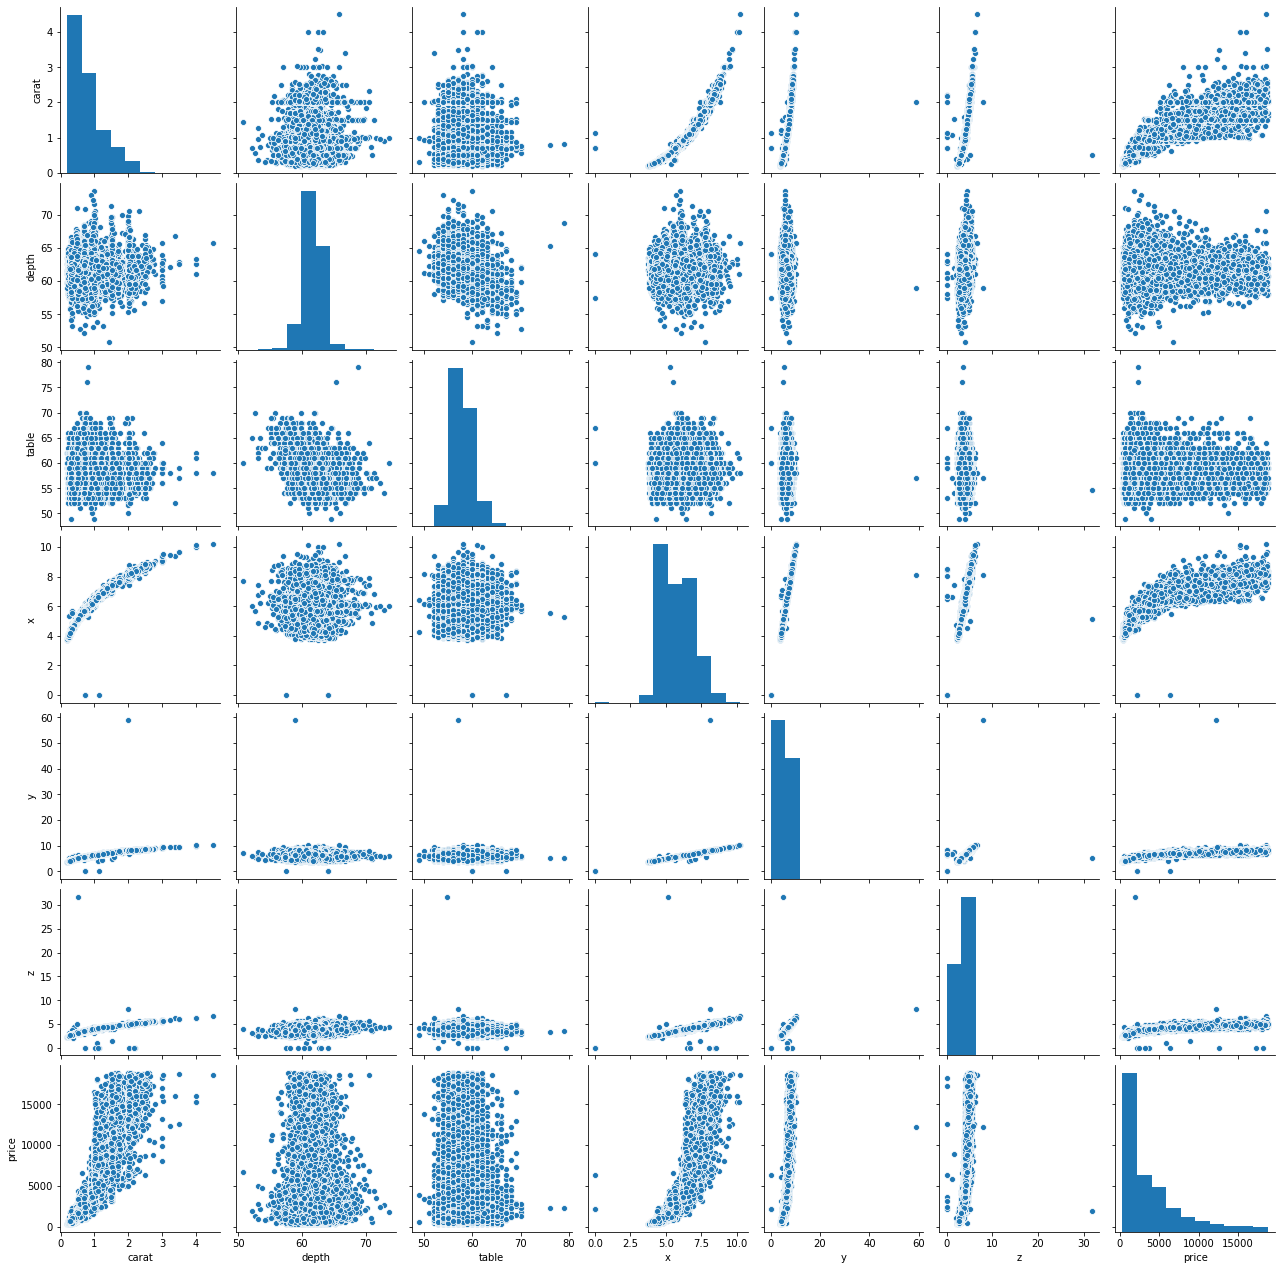

In [17]:
sns.pairplot(data=cubic)

In [18]:
np.round(cubic.corr(),2)

,carat,depth,table,x,y,z,price
carat,1.00,0.04,0.18,0.98,0.94,0.94,0.92
depth,0.04,1.00,-0.30,-0.02,-0.02,0.10,-0.00
table,0.18,-0.30,1.00,0.20,0.18,0.15,0.13
x,0.98,-0.02,0.20,1.00,0.96,0.96,0.89
y,0.94,-0.02,0.18,0.96,1.00,0.93,0.86
z,0.94,0.10,0.15,0.96,0.93,1.00,0.85
price,0.92,-0.00,0.13,0.89,0.86,0.85,1.00


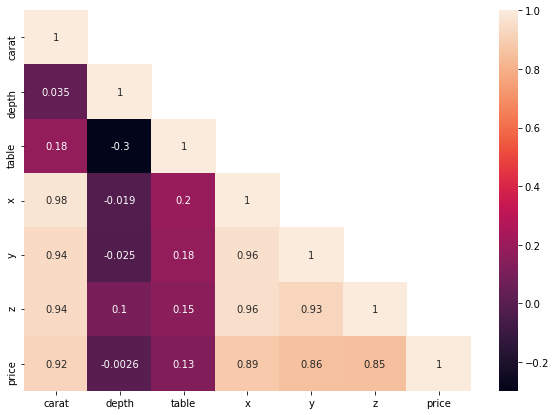

In [19]:
#sns.heatmap(cubic.corr(),annot=True,linewidths=2)
plt.figure(figsize=(10,7))
sns.heatmap(cubic.corr(), annot=True,mask=np.triu(cubic.corr(),+1));

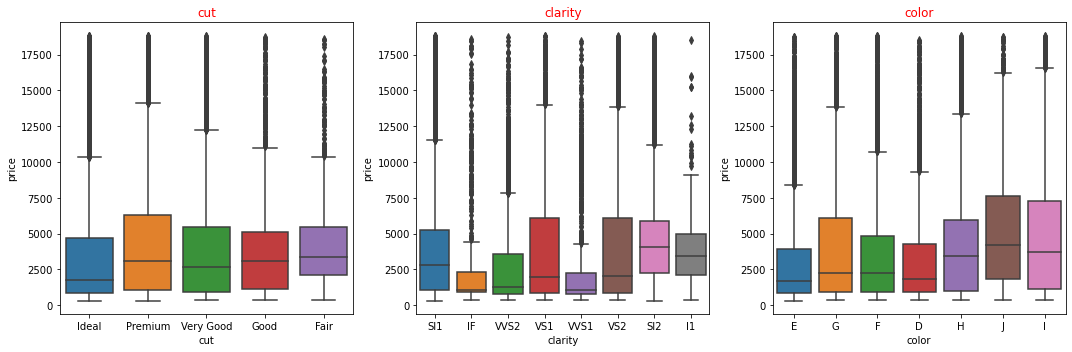

In [20]:
fig=plt.figure(figsize=(15,5))
cat=['cut','clarity','color']
for i in range(0,3):
    ax= fig.add_subplot(1,3,i+1)
    sns.boxplot(y='price',x=cat[i],data=cubic)
    ax.set_title(cat[i],color='Red')
plt.tight_layout()
plt.show()

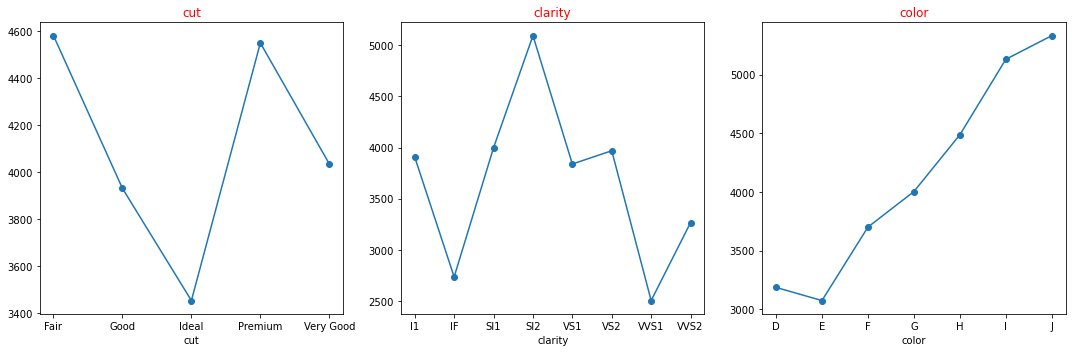

In [21]:
fig=plt.figure(figsize=(15,5))
cat=['cut','clarity','color']
for i in range(0,3):
    ax= fig.add_subplot(1,3,i+1)
    cubic.groupby(cat[i]).mean()['price'].plot(kind='line',marker='o')
    ax.set_title(cat[i],color='Red')
plt.tight_layout()
plt.show()

lr,ur = remove_outlier(cubic.x)
cubic.x = np.where(cubic.x<lr ,lr , cubic.x)
cubic.x = np.where(cubic.x>ur ,ur , cubic.x)
lr,ur = remove_outlier(cubic.y)
cubic.y = np.where(cubic.y<lr ,lr , cubic.y)
cubic.y = np.where(cubic.y>ur ,ur , cubic.y)
lr,ur = remove_outlier(cubic.depth)
cubic.depth = np.where(cubic.depth<lr ,lr , cubic.depth)
cubic.depth = np.where(cubic.depth>ur ,ur , cubic.depth)
lr,ur = remove_outlier(cubic.carat)
cubic.depth = np.where(cubic.carat<lr ,lr , cubic.carat)
cubic.depth = np.where(cubic.carat>ur ,ur , cubic.carat)
lr,ur = remove_outlier(cubic.z)
cubic.z = np.where(cubic.z<lr ,lr , cubic.z)
cubic.z = np.where(cubic.z>ur ,ur , cubic.z)
lr,ur = remove_outlier(cubic.table)
cubic.table = np.where(cubic.table<lr ,lr , cubic.table)
cubic.table = np.where(cubic.table>ur ,ur , cubic.table)
lr,ur = remove_outlier(cubic.price)
cubic.price = np.where(cubic.price<lr ,lr , cubic.price)
cubic.price = np.where(cubic.price>ur ,ur , cubic.price)

# Q2

In [22]:
cubic.depth.fillna(cubic.depth.mean(),inplace=True)

In [23]:
cubic['x']=cubic['x'].replace(0,np.nan)
cubic['x'].dropna(inplace=True)
cubic['y']=cubic['y'].replace(0,np.nan)
cubic['y'].dropna(inplace=True)
cubic['z']=cubic['z'].replace(0.0,np.nan)
cubic.dropna(inplace=True)

In [24]:
cubic.y=cubic.y.replace(cubic.y.max(),cubic.y.mean())
cubic.z=cubic.z.replace(cubic.z.max(),cubic.z.mean())

In [25]:
cubic.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [26]:
cubic.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [27]:
cubic.clarity.replace("FL",10,inplace=True)
cubic.clarity.replace("IF",9,inplace=True)
cubic.clarity.replace("VVS1",8,inplace=True)
cubic.clarity.replace("VVS2",7,inplace=True)
cubic.clarity.replace("VS1",6,inplace=True)
cubic.clarity.replace("VS2",5,inplace=True)
cubic.clarity.replace("SI1",4,inplace=True)
cubic.clarity.replace("SI2",3,inplace=True)
cubic.clarity.replace("I1",2,inplace=True)
cubic.clarity.replace("I2",1,inplace=True)
cubic.clarity.replace("I3",0,inplace=True)

In [28]:
cubic.color.replace("D",6,inplace=True)
cubic.color.replace("E",5,inplace=True)
cubic.color.replace("F",4,inplace=True)
cubic.color.replace("G",3,inplace=True)
cubic.color.replace("H",2,inplace=True)
cubic.color.replace("I",1,inplace=True)
cubic.color.replace("J",0,inplace=True)

In [29]:
cubic.cut.replace("Ideal",4,inplace=True)
cubic.cut.replace("Premium",3,inplace=True)
cubic.cut.replace("Very Good",2,inplace=True)
cubic.cut.replace("Good",1,inplace=True)
cubic.cut.replace("Fair",0,inplace=True)

# PCA

In [30]:
cubic['volume']= cubic.x*cubic.y*cubic.z

In [31]:
cubic=cubic.drop('x',axis=1)
cubic=cubic.drop('y',axis=1)
cubic=cubic.drop('z',axis=1)

In [32]:
cubic.describe()

,carat,cut,color,clarity,depth,table,price,volume
count,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000,26958.000000
mean,0.798190,2.909786,3.394095,5.053639,61.745340,57.455342,3938.311262,129.882987
std,0.477602,1.113152,1.706180,1.646895,1.394016,2.231227,4023.359737,77.050791
min,0.200000,0.000000,0.000000,2.000000,50.800000,49.000000,326.000000,32.243239
25%,0.400000,2.000000,2.000000,4.000000,61.100000,56.000000,945.000000,64.777280
50%,0.700000,3.000000,3.000000,5.000000,61.800000,57.000000,2375.000000,114.643887
75%,1.050000,4.000000,5.000000,6.000000,62.500000,59.000000,5358.000000,171.373928
max,4.500000,4.000000,6.000000,9.000000,73.600000,79.000000,18818.000000,698.455296


In [33]:
X = cubic.drop('price',axis=1)
y=cubic.price

In [34]:
from scipy.stats import zscore
Xs = X.apply(zscore)

from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(X)
Xs = pca.transform(X)

np.round(pca.explained_variance_ratio_*100,1)

In [35]:
Xs.shape

(26958, 7)

Xs = pd.DataFrame(Xs,columns=['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9'])

pca.components_.shape

df_corr = pd.DataFrame(np.round(pca.components_,2),columns=X.columns)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(Xs, y, test_size=0.30 , random_state=0)

In [37]:
# invoke the LinearRegression function and find the bestfit model on training data
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))
# Let us check the intercept for the model
intercept = regression_model.intercept_
print("The intercept for our model is {}".format(intercept))
# R square on training data
print('R2 on train data',regression_model.score(X_train, y_train))
# R square on test data
print('R2 on test data',regression_model.score(X_test, y_test))
#RMSE on Training data
se = np.mean((regression_model.predict(X_train)-y_train)**2)
print('RMSE on train data',math.sqrt(se))
#RMSE on Testing data
tse = np.mean((regression_model.predict(X_test)-y_test)**2)
print('RMSE on test data',math.sqrt(tse))


The coefficient for carat is 1008.8248454436457
The coefficient for cut is 123.18774048298829
The coefficient for color is 559.0640269380579
The coefficient for clarity is 864.73603035381
The coefficient for depth is 1.2163289135357243
The coefficient for table is -18.577462857454165
The coefficient for volume is 3196.0514336732026
The intercept for our model is 3939.47500855847
R2 on train data 0.9053062515615813
R2 on test data 0.9100054941987957
RMSE on train data 1236.3632319549802
RMSE on test data 1210.795799034468


In [38]:
vif = [variance_inflation_factor(X_train.values, ix) for ix in range(X_train.shape[1])] 

In [39]:
i=0
for column in X.columns:
    if i < 30:
        print (column ,"--->",  vif[i])
        i = i+1

carat ---> 565.8077906252626
cut ---> 1.5015026975152672
color ---> 1.1181860607688971
clarity ---> 1.1962033718284975
depth ---> 1.5854022311723714
table ---> 1.7240594423212035
volume ---> 561.40767076711


In [40]:
#using stats model

In [41]:
# concatenate X and y into a single dataframe
data_train =pd.concat([X_train,y_train],axis=1)
data_train.head(5)
data_test =pd.concat([X_test,y_test],axis=1)

In [42]:
expr='price ~ carat+depth+table+volume+color+cut+clarity'

In [43]:
import statsmodels.formula.api as smf
lm1 = smf.ols(formula=expr, data = data_train).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.905
Method:                 Least Squares   F-statistic:                 2.576e+04
Date:                Wed, 23 Sep 2020   Prob (F-statistic):               0.00
Time:                        20:08:24   Log-Likelihood:            -1.6113e+05
No. Observations:               18870   AIC:                         3.223e+05
Df Residuals:                   18862   BIC:                         3.223e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3939.4750      9.003    437.572      0.0

In [44]:
# Calculate MSE
se = np.mean((lm1.predict(data_train)-y_train)**2)
#np.sqrt(se)
#y_train
print('EMSE of train data',np.sqrt(se))
tse = np.mean((lm1.predict(data_test)-y_test)**2)
#np.sqrt(se)
#y_train
print('EMSE of train data',np.sqrt(tse))

EMSE of train data 1236.3632319549797
EMSE of train data 1210.7957990344678


In [45]:
# Prediction on Test data
y_pred = lm1.predict(data_test)

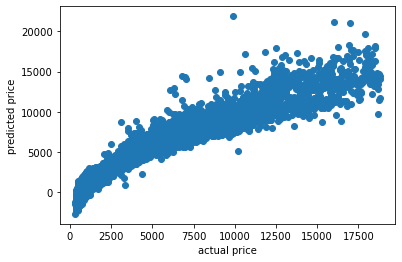

In [46]:
plt.scatter(y_test, y_pred)
plt.ylabel('predicted price')
plt.xlabel('actual price')
plt.show()

In [47]:
for i,j in np.array(lm1.params.reset_index()):
    print('({}) * {} +'.format(round(j,2),i),end=' ')

(3939.48) * Intercept + (1008.82) * carat + (1.22) * depth + (-18.58) * table + (3196.05) * volume + (559.06) * color + (123.19) * cut + (864.74) * clarity + 

In [48]:
residuals = y_test-y_pred

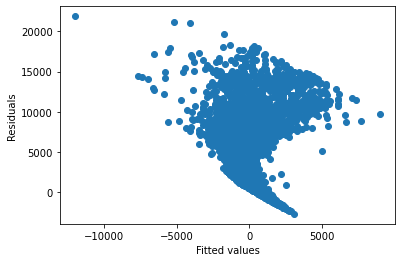

In [49]:
plt.scatter(residuals,y_pred)
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.show()

## Remodel by dropping unwantd columns 

In [50]:
X2 = Xs.drop(['depth','table'],axis=1)

In [51]:
tn , tst , ytrn , ytst = train_test_split(X2, y, test_size=0.30 , random_state=0)

In [52]:
# invoke the LinearRegression function and find the bestfit model on training data
reg = LinearRegression()
reg.fit(tn, ytrn)
for idx, col_name in enumerate(tn.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[idx]))
# Let us check the intercept for the model
intercept = reg.intercept_
print("The intercept for our model is {}".format(intercept))
# R square on training data
print('R2 on train data',reg.score(tn, ytrn))
# R square on test data
print('R2 on test data',reg.score(tst, ytst))
#RMSE on Training data
se = np.mean((reg.predict(tn)-ytrn)**2)
print('RMSE on train data',math.sqrt(se))
#RMSE on Testing data
tse = np.mean((reg.predict(tst)-ytst)**2)
print('RMSE on test data',math.sqrt(tse))


The coefficient for carat is 1008.8248454436457
The coefficient for cut is 123.18774048298829
The coefficient for color is 559.0640269380579
The coefficient for clarity is 864.73603035381
The coefficient for volume is 1.2163289135357243
The intercept for our model is 3939.574207010303
R2 on train data 0.905288363148644
R2 on test data 0.9099904624810483
RMSE on train data 1236.480005934237
RMSE on test data 1210.8969139892363


# Problem 2: Logistic Regression and LDA

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

Data Dictionary:

Variable Name	Description

Holiday_Package 	 Opted for Holiday Package yes/no?

Salary 	 Employee salary

age 	 Age in years

edu 	 Years of formal education

no_young_children 	 The number of young children (younger than 7 years)

no_older_children 	 Number of older children

foreign 	 foreigner Yes/No
 

In [53]:
holiday = pd.read_csv('D:/Data/Predictive/project/Holiday_Package.csv')

In [54]:
holiday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [55]:
holiday = holiday.drop('Unnamed: 0',axis=1)

In [56]:
holiday.shape

(872, 7)

In [57]:
holiday.duplicated().sum()

0

In [58]:
holiday.describe(include='all')

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
count,872,872.000000,872.000000,872.000000,872.000000,872.000000,872
unique,2,NaN,NaN,NaN,NaN,NaN,2
top,no,NaN,NaN,NaN,NaN,NaN,no
freq,471,NaN,NaN,NaN,NaN,NaN,656
mean,NaN,47729.172018,39.955275,9.307339,0.311927,0.982798,NaN
std,NaN,23418.668531,10.551675,3.036259,0.612870,1.086786,NaN
min,NaN,1322.000000,20.000000,1.000000,0.000000,0.000000,NaN
25%,NaN,35324.000000,32.000000,8.000000,0.000000,0.000000,NaN
50%,NaN,41903.500000,39.000000,9.000000,0.000000,1.000000,NaN
75%,NaN,53469.500000,48.000000,12.000000,0.000000,2.000000,NaN


In [59]:
holiday.head(5)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,no,48412,30,8,1,1,no
1,yes,37207,45,8,0,1,no
2,no,58022,46,9,0,0,no
3,no,66503,31,11,2,0,no
4,no,66734,44,12,0,2,no


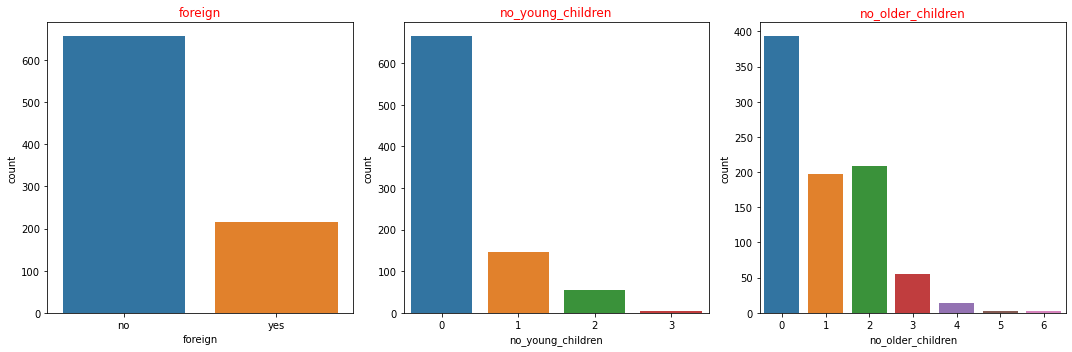

In [60]:
fig=plt.figure(figsize=(15,5))
cat=['foreign','no_young_children','no_older_children']
for i in range(0,3):
    ax= fig.add_subplot(1,3,i+1)
    sns.countplot(cat[i],data=holiday)
    ax.set_title(cat[i],color='Red')
plt.tight_layout()
plt.show()

In [61]:
holiday['foreign'].value_counts(normalize=True)

no     0.752294
yes    0.247706
Name: foreign, dtype: float64

In [62]:
holiday['no_young_children'].value_counts(normalize=True)

0    0.762615
1    0.168578
2    0.063073
3    0.005734
Name: no_young_children, dtype: float64

In [63]:
holiday['no_older_children'].value_counts(normalize=True)

0    0.450688
2    0.238532
1    0.227064
3    0.063073
4    0.016055
6    0.002294
5    0.002294
Name: no_older_children, dtype: float64

In [64]:
holiday['Holliday_Package'].value_counts(normalize=True)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

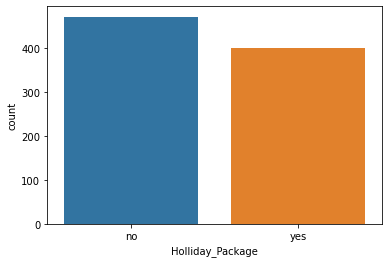

In [65]:
sns.countplot(holiday.Holliday_Package)

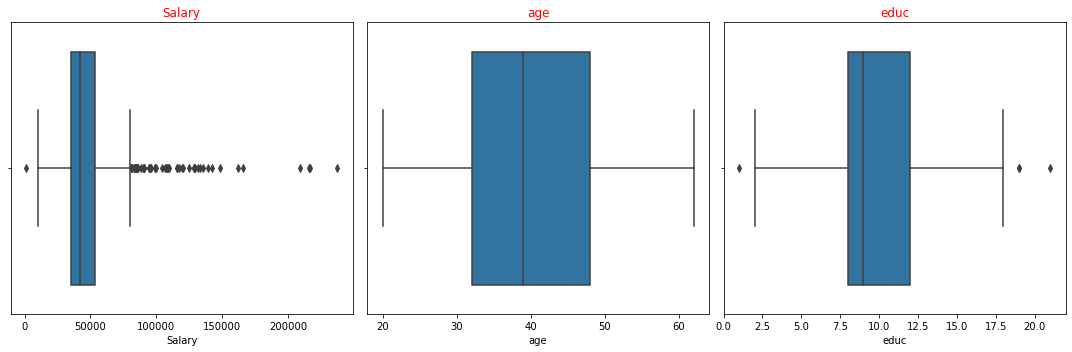

In [66]:

fig=plt.figure(figsize=(15,5))
cont =['Salary','age','educ']
for i in range(0,3):
    ax= fig.add_subplot(1,3,i+1)
    sns.boxplot(cont[i],data=holiday)
    ax.set_title(cont[i],color='Red')
plt.tight_layout()
plt.show()

In [67]:
holiday.skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

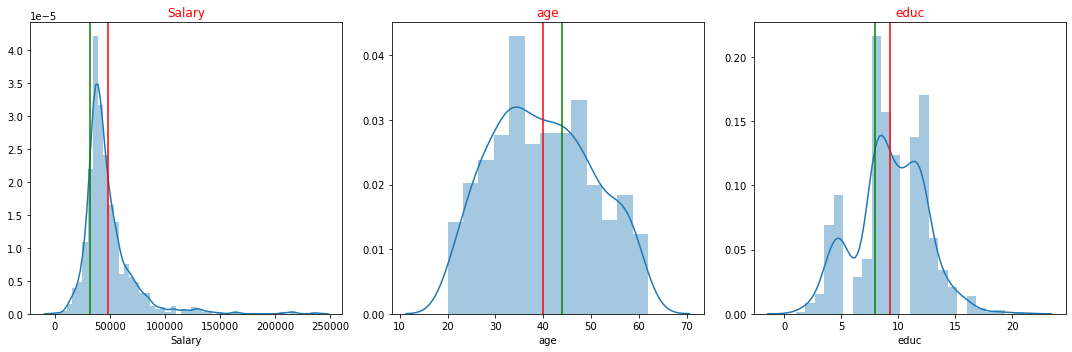

In [68]:

fig=plt.figure(figsize=(15,5))
cont =['Salary','age','educ']
for i in range(0,3):
    ax= fig.add_subplot(1,3,i+1)
    sns.distplot(holiday[cont[i]])
    plt.axvline(holiday[cont[i]].mean(),color='Red', label='mean')
    plt.axvline(holiday[cont[i]].mode()[0],color='Green', label='mode')
    ax.set_title(cont[i],color='Red')
plt.tight_layout()
plt.show()

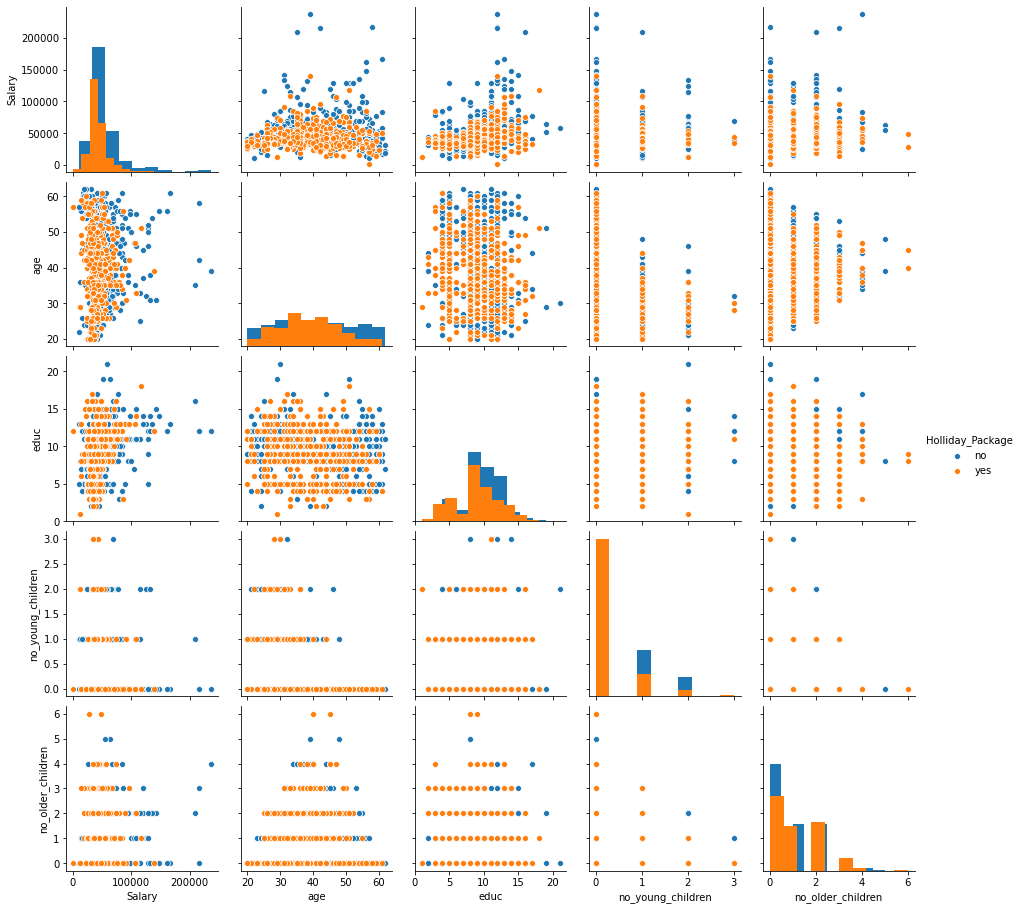

In [69]:
sns.pairplot(holiday ,diag_kind='hist' ,hue='Holliday_Package')

In [70]:
np.round(holiday.corr(),2)

,Salary,age,educ,no_young_children,no_older_children
Salary,1.00,0.07,0.33,-0.03,0.11
age,0.07,1.00,-0.15,-0.52,-0.12
educ,0.33,-0.15,1.00,0.10,-0.04
no_young_children,-0.03,-0.52,0.10,1.00,-0.24
no_older_children,0.11,-0.12,-0.04,-0.24,1.00


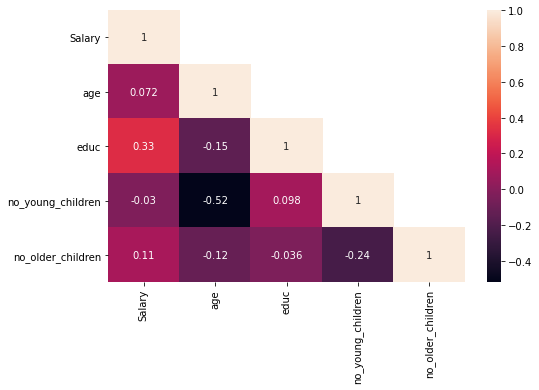

In [71]:
#sns.heatmap(cubic.corr(),annot=True,linewidths=2)
plt.figure(figsize=(8,5))
sns.heatmap(holiday.corr(), annot=True,mask=np.triu(holiday.corr(),+1));

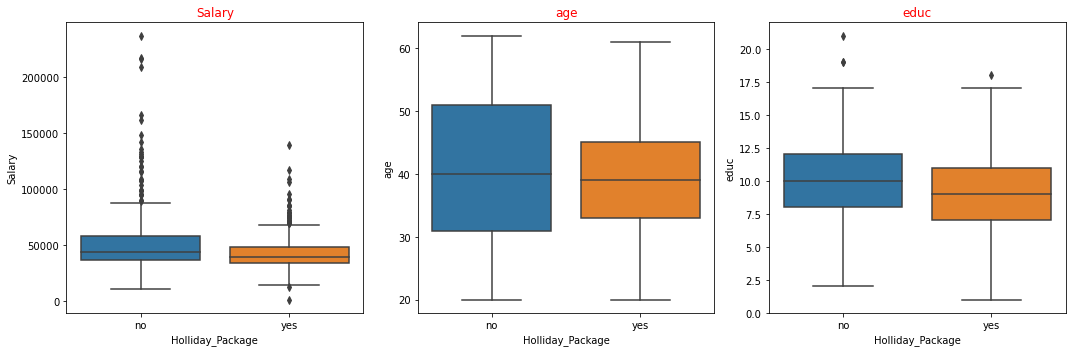

In [72]:
fig=plt.figure(figsize=(15,5))
for i in range(0,3):
    ax= fig.add_subplot(1,3,i+1)
    sns.boxplot(x='Holliday_Package',y=cont[i],data=holiday,orient='v')
    ax.set_title(cont[i],color='Red')
plt.tight_layout()
plt.show()


In [73]:
pd.crosstab(holiday.no_older_children,holiday.Holliday_Package,normalize=True)

Holliday_Package,no,yes
no_older_children,,
0,0.264908,0.185780
1,0.116972,0.110092
2,0.116972,0.121560
3,0.030963,0.032110
4,0.008028,0.008028
5,0.002294,0.000000
6,0.000000,0.002294


In [74]:
pd.crosstab(holiday.foreign,holiday.Holliday_Package,normalize=True,margins=True)

Holliday_Package,no,yes,All
foreign,,,
no,0.461009,0.291284,0.752294
yes,0.079128,0.168578,0.247706
All,0.540138,0.459862,1.000000


<Figure size 1080x360 with 0 Axes>

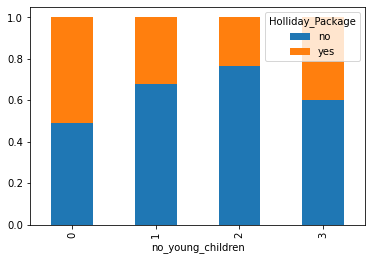

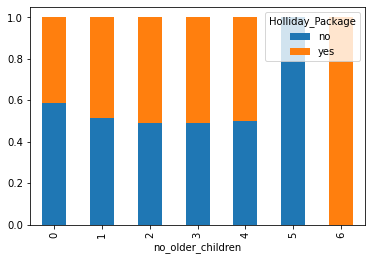

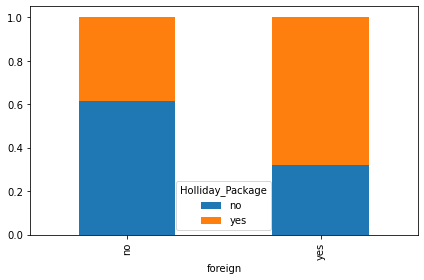

In [75]:
cat = ['no_young_children','no_older_children','foreign']
fig=plt.figure(figsize=(15,5))
for i in range(0,3):
    #ax= fig.add_subplot(1,3,i+1)
    #sns.countplot(holiday[cat[i]],hue=holiday.Holliday_Package)
    gender =pd.crosstab(holiday[cat[i]],holiday.Holliday_Package,normalize=True)
    gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
    #ax.set_title(cat[i],color='Red')
plt.tight_layout()
plt.show()


In [76]:
holiday.foreign = pd.Categorical(holiday.foreign).codes
holiday.Holliday_Package = pd.Categorical(holiday.Holliday_Package).codes

In [77]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [78]:
lr,ur = remove_outlier(holiday.Salary)
holiday.Salary = np.where(holiday.Salary<lr,lr,holiday.Salary)
holiday.Salary = np.where(holiday.Salary>ur,ur,holiday.Salary)
lr,ur = remove_outlier(holiday.educ)
holiday.educ = np.where(holiday.educ<lr,lr,holiday.educ)
holiday.educ = np.where(holiday.educ>ur,ur,holiday.educ)

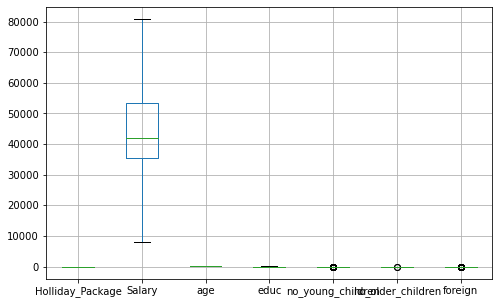

In [79]:
holiday.boxplot(figsize=(8,5))

In [80]:
X=holiday.drop('Holliday_Package',axis=1)
y=holiday.Holliday_Package

In [81]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [82]:
y_train.value_counts(normalize=True)

0    0.545902
1    0.454098
Name: Holliday_Package, dtype: float64

In [83]:
y_test.value_counts(normalize=True)

0    0.526718
1    0.473282
Name: Holliday_Package, dtype: float64

In [84]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('train_labels',y_train.shape)
print('test_labels',y_test.shape)
print('Total Obs',X.shape[0])

X_train (610, 6)
X_test (262, 6)
train_labels (610,)
test_labels (262,)
Total Obs 872


In [85]:
grid={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg'],
      'tol':[0.0001,0.00001]}

In [86]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=100000)

In [87]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)
best_model = grid_search.best_estimator_

{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001} 

LogisticRegression(max_iter=100000, penalty='none', solver='newton-cg')


C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line 

model accuracy for train data 0.6721311475409836
model accuracy for test data 0.6564885496183206
Confusion Matrix test 
 [[100  38]
 [ 52  72]] 

Classification Report test 
               precision    recall  f1-score   support

           0       0.66      0.72      0.69       138
           1       0.65      0.58      0.62       124

    accuracy                           0.66       262
   macro avg       0.66      0.65      0.65       262
weighted avg       0.66      0.66      0.65       262

Confusion Matrix train 
 [[255  78]
 [122 155]] 

Classification Report train 
               precision    recall  f1-score   support

           0       0.68      0.77      0.72       333
           1       0.67      0.56      0.61       277

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610



Text(232.61818181818177, 0.5, 'Actual Label')

<Figure size 576x288 with 0 Axes>

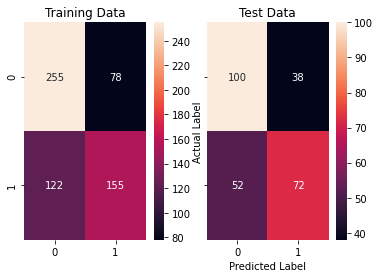

In [88]:
t_pred_trn = best_model.predict(X_train)
y_pred = best_model.predict(X_test)
print('model accuracy for train data',best_model.score(X_train,y_train))
print('model accuracy for test data',best_model.score(X_test,y_test))
print('Confusion Matrix test','\n',confusion_matrix(y_test, y_pred),'\n')
print('Classification Report test','\n',classification_report(y_test, y_pred))
print('Confusion Matrix train','\n',confusion_matrix(y_train, t_pred_trn),'\n')
print('Classification Report train','\n',classification_report(y_train, t_pred_trn))
plt.figure(figsize=(8,4))
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((confusion_matrix(y_train,t_pred_trn)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap(( confusion_matrix(y_test,y_pred)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

In [89]:
#model.coef_[0][1]
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, np.round(best_model.coef_[0][idx],3)))

The coefficient for Salary is -0.0
The coefficient for age is -0.055
The coefficient for educ is 0.04
The coefficient for no_young_children is -1.468
The coefficient for no_older_children is -0.043
The coefficient for foreign is 1.252


In [90]:
best_model.intercept_

array([2.60641543])

AUC for the Training Data: 0.736
AUC for the Test Data: 0.718


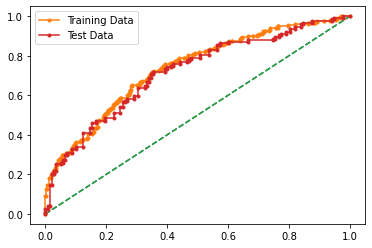

In [91]:
# AUC and ROC for the training data
# Training Data Probability Prediction
prob_trn = best_model.predict_proba(X_train)

# Test Data Probability Prediction
prob_tst = best_model.predict_proba(X_test)
# calculate AUC
auc = roc_auc_score(y_train,prob_trn[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_train,prob_trn[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = roc_auc_score(y_test,prob_tst[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test,prob_tst[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.show()

# LDA

In [92]:
clf = LinearDiscriminantAnalysis()
model1=clf.fit(X_train,y_train)
pred_class = model1.predict(X_test)
pred_class_trn=model1.predict(X_train)
#print(classification_report(y_test, pred_class))

print('model accuracy for train data',model1.score(X_train,y_train))
print('model accuracy for test data',model1.score(X_test,y_test))
print('Confusion Matrix test','\n',confusion_matrix(y_test, pred_class),'\n')
print('Classification Report test','\n',classification_report(y_test, pred_class))
print('Confusion Matrix train','\n',confusion_matrix(y_train, pred_class_trn),'\n')
print('Classification Report train','\n',classification_report(y_train, pred_class_trn))

In [93]:
from sklearn import metrics

Classification Report of the training data:

               precision    recall  f1-score   support

           0       0.67      0.77      0.72       333
           1       0.67      0.55      0.60       277

    accuracy                           0.67       610
   macro avg       0.67      0.66      0.66       610
weighted avg       0.67      0.67      0.67       610
 

Classification Report of the test data:

               precision    recall  f1-score   support

           0       0.67      0.74      0.70       138
           1       0.67      0.59      0.63       124

    accuracy                           0.67       262
   macro avg       0.67      0.66      0.66       262
weighted avg       0.67      0.67      0.67       262
 



<Figure size 576x288 with 0 Axes>

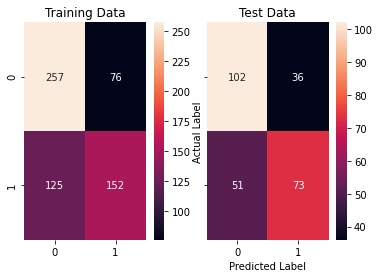

In [94]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model1.predict(X_train)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model1.predict(X_test)
plt.figure(figsize=(8,4))
f,a =  plt.subplots(1,2,sharex=True,sharey=True,squeeze=False)

#Plotting confusion matrix for the different models for the Training Data

plot_0 = sns.heatmap((metrics.confusion_matrix(y_train,pred_class_train)),annot=True,fmt='.5g',ax=a[0][0]);
a[0][0].set_title('Training Data')
plot_1 = sns.heatmap((metrics.confusion_matrix(y_test,pred_class_test)),annot=True,fmt='.5g',ax=a[0][1]);
a[0][1].set_title('Test Data');
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')

print('Classification Report of the training data:\n\n',metrics.classification_report(y_train,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')


# Training Data Probability Prediction
pred_prob_train = model1.predict_proba(X_train)

# Test Data Probability Prediction
pred_prob_test = model1.predict_proba(X_test)

In [95]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, np.round(model1.coef_[0][idx],3)))

The coefficient for Salary is -0.0
The coefficient for age is -0.054
The coefficient for educ is 0.042
The coefficient for no_young_children is -1.327
The coefficient for no_older_children is -0.026
The coefficient for foreign is 1.277


AUC for the Training Data: 0.734
AUC for the Test Data: 0.718


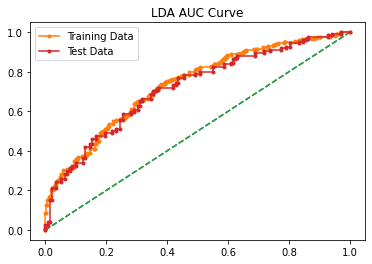

In [96]:
# AUC and ROC for the training data

# calculate AUC
auc = metrics.roc_auc_score(y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')


# AUC and ROC for the test data

# calculate AUC
auc = metrics.roc_auc_score(y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')
# show the plot
plt.legend(loc='best')
plt.title('LDA AUC Curve')
plt.show()

0.1 

Accuracy Score 0.4721
F1 Score 0.6307 

Confusion Matrix


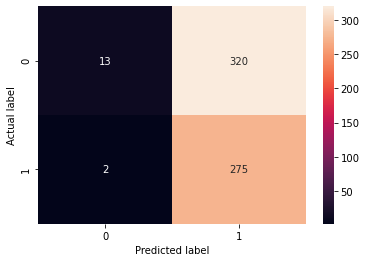

0.2 

Accuracy Score 0.5066
F1 Score 0.6404 

Confusion Matrix


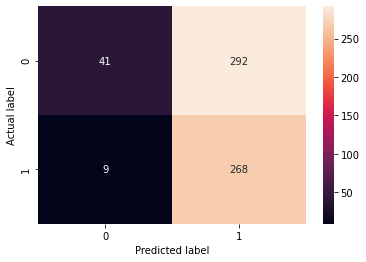

0.3 

Accuracy Score 0.5885
F1 Score 0.6675 

Confusion Matrix


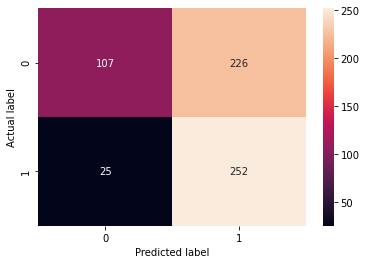

0.4 

Accuracy Score 0.6672
F1 Score 0.6678 

Confusion Matrix


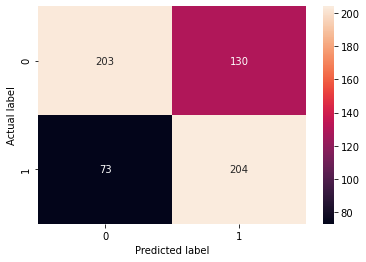

0.5 

Accuracy Score 0.6705
F1 Score 0.602 

Confusion Matrix


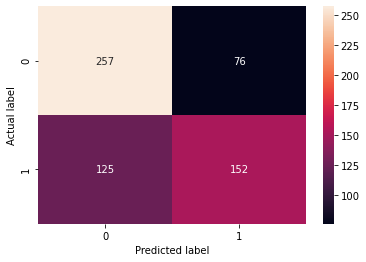

0.6 

Accuracy Score 0.6475
F1 Score 0.5012 

Confusion Matrix


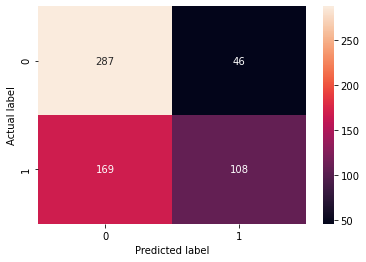

0.7 

Accuracy Score 0.641
F1 Score 0.4033 

Confusion Matrix


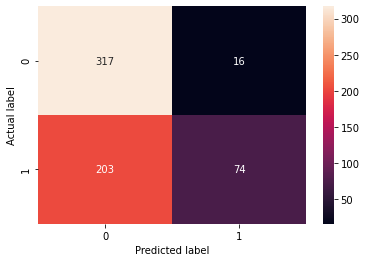

0.8 

Accuracy Score 0.5951
F1 Score 0.2006 

Confusion Matrix


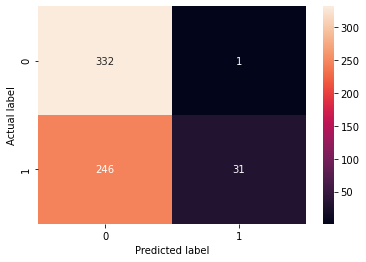

0.9 

Accuracy Score 0.5492
F1 Score 0.0143 

Confusion Matrix


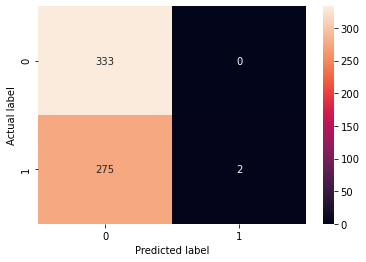

In [97]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_train)):#defining a loop for the length of the test data
        if np.array(pred_prob_train[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_train,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_train,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_train,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.show();

0.1 

Accuracy Score 0.4847
F1 Score 0.6475 



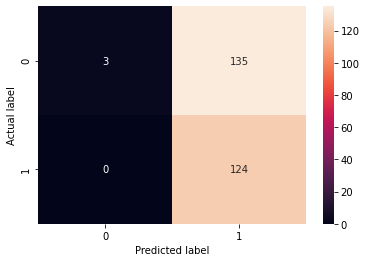

0.2 

Accuracy Score 0.5115
F1 Score 0.6541 



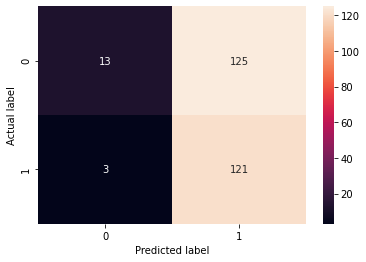

0.3 

Accuracy Score 0.5725
F1 Score 0.6647 



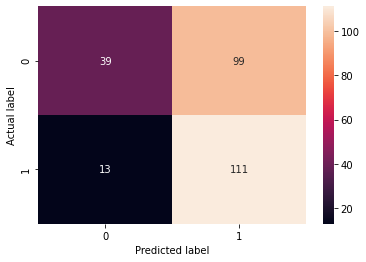

0.4 

Accuracy Score 0.6527
F1 Score 0.6667 



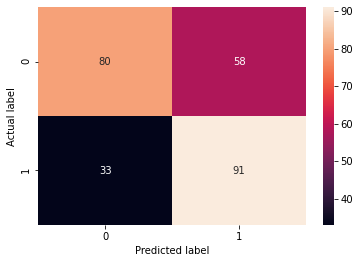

0.5 

Accuracy Score 0.6679
F1 Score 0.6266 



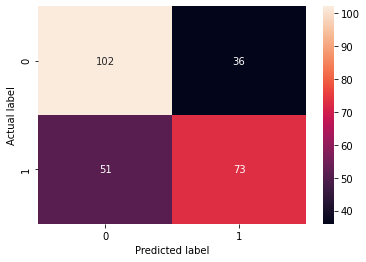

0.6 

Accuracy Score 0.6527
F1 Score 0.5381 



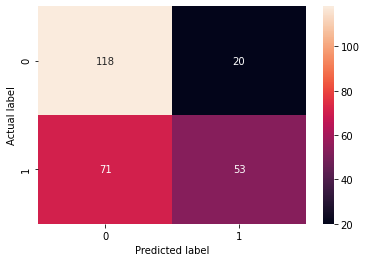

0.7 

Accuracy Score 0.626
F1 Score 0.4235 



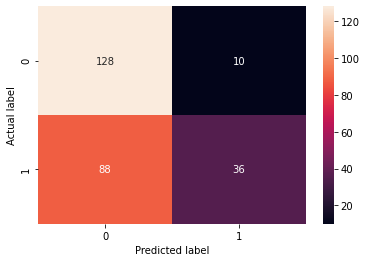

0.8 

Accuracy Score 0.5534
F1 Score 0.1333 



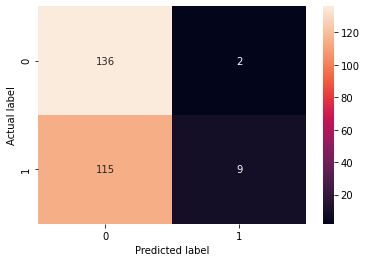

0.9 

Accuracy Score 0.5305
F1 Score 0.016 



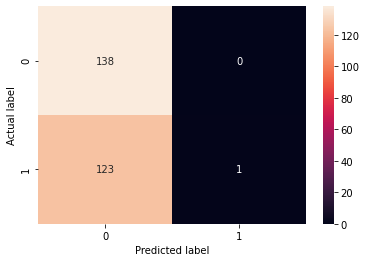

In [98]:
for j in np.arange(0.1,1,0.1):
    custom_prob = j #defining the cut-off value of our choice
    custom_cutoff_data=[]#defining an empty list
    for i in range(0,len(y_test)):#defining a loop for the length of the test data
        if np.array(pred_prob_test[:,1])[i] > custom_prob:#issuing a condition for our probability values to be 
            #greater than the custom cutoff value
            a=1#if the probability values are greater than the custom cutoff then the value should be 1
        else:
            a=0#if the probability values are less than the custom cutoff then the value should be 0
        custom_cutoff_data.append(a)#adding either 1 or 0 based on the condition to the end of the list defined by us
    print(round(j,3),'\n')
    print('Accuracy Score',round(metrics.accuracy_score(y_test,custom_cutoff_data),4))
    print('F1 Score',round(metrics.f1_score(y_test,custom_cutoff_data),4),'\n')
    plt.figure(figsize=(6,4))
    #print('Confusion Matrix')
    sns.heatmap(metrics.confusion_matrix(y_test,custom_cutoff_data),annot=True,fmt='.4g'),'\n\n'
    plt.xlabel('Predicted label')
    plt.ylabel('Actual label')
    plt.show();